## Ondometro LabOceano
- Calculate wave height for all the points in one creast

In [281]:
import os
import matplotlib.pyplot as plt
from matplotlib import reload
import cv2
import ondometro
reload(ondometro)

<module 'ondometro' from '/home/lioc/git/ondometro/ondometro.py'>

### Input - pathname and frame time

In [282]:
# paths dos videos
pathname = os.environ['HOME'] + '/Documents/ondometro_videos/laboceano/'

video_inf = os.path.join(pathname + 'CAM3/T100/', 'T100_570003_CAM3.avi')
video_sup = os.path.join(pathname + 'CAM1/T100/', 'T100_570003_CAM1.avi')

# path de saida das imagens
# pathout = os.environ['HOME'] + '/Documents/teste9/'

# numero do frame inicial e final do trecho do video a processar
timei, timef = '00:52', '00:53'

### Input - LabOceano references

In [283]:
# altura nominal da onda, em metros
alt_nominal_onda = 0.1

# periodo nominal onda
per_nominal_onda = 1.4

# comprimento nominal onda
comp_nominal_onda = 1.56 * per_nominal_onda**2

# distancia da baliza ao batedor
dist_bal_bat = 7.5

# distancia da camera ao batedor, em metros
dist_cam_bat = 14.71

# valor da medicao inferior e superior da baliza, em metros
val_bal_1 = 0
val_bal_2 = 0.2

# altura das cameras superior e infeior com relacao ao nivel da agua, em metros
alt_cam_inf = 0.24
alt_cam_sup = 0.48
# alt_cams = [0.24, 0.48]

# altura do zero da regua (b) ate o nivel de agua, em metros
alt_bal_nm = 0.172

# coordenada y do pixel da marcacao inferior (1) e superior (2) da baliza da camera inferior
pix_bal_1_inf = 353
pix_bal_2_inf = 196
# pix_bal_1_inf = 355
# pix_bal_2_inf = 200

# coordenada y do pixel da marcacao inferior (1) e superior (2) da baliza da camera superior
pix_bal_1_sup = 710
pix_bal_2_sup = 563
# pix_bal_1_sup = 355
# pix_bal_2_sup = 200

# lista de coordenada y dos pixels das cristas
pix_cr_inf = [420, 500, 746]
pix_cr_sup = [756, 916]

## Call functions

In [284]:
# load video

cap_inf, fps_inf = ondometro.carregar_video(video_inf)
cap_sup, fps_sup = ondometro.carregar_video(video_sup)

In [285]:
# find initial and final frames based on time MM:SS

nfi_inf, nff_inf = ondometro.achar_frame_inicial_e_final(timei, timef, fps_inf)
nfi_sup, nff_sup = ondometro.achar_frame_inicial_e_final(timei, timef, fps_sup)

In [286]:
# read frames

frame_inf = ondometro.carregar_frame(cap_inf, ff=nfi_inf)
frame_sup = ondometro.carregar_frame(cap_sup, ff=nfi_sup)

In [287]:
# converte para cinza

im_inf = cv2.cvtColor(frame_inf, cv2.COLOR_BGR2GRAY)
im_sup = cv2.cvtColor(frame_sup, cv2.COLOR_BGR2GRAY)

In [288]:
# find list of creasts

cristas_inf = ondometro.achar_crista(img=im_inf, ncristas=10, linf=400, lsup=800)
cristas_sup = ondometro.achar_crista(img=im_sup, ncristas=10, linf=665, lsup=950)

/usr/local/python/anaconda3/lib/python3.6/site-packages/peakutils/peak.py:84: RuntimeWarning: invalid value encountered in less
  & (np.greater(y, thres)))[0]
/usr/local/python/anaconda3/lib/python3.6/site-packages/peakutils/peak.py:84: RuntimeWarning: invalid value encountered in greater
  & (np.greater(y, thres)))[0]
/home/lioc/git/ondometro/ondometro.py:298: RuntimeWarning: invalid value encountered in less
  cristas[l, np.where(cr < np.nanmean(cr[:20]) - 10)[0]] = np.nan
/home/lioc/git/ondometro/ondometro.py:297: RuntimeWarning: invalid value encountered in greater
  cristas[l, np.where(cr > np.nanmean(cr[:20]) + 10)[0]] = np.nan
/home/lioc/git/ondometro/ondometro.py:297: RuntimeWarning: Mean of empty slice
  cristas[l, np.where(cr > np.nanmean(cr[:20]) + 10)[0]] = np.nan
/home/lioc/git/ondometro/ondometro.py:298: RuntimeWarning: Mean of empty slice
  cristas[l, np.where(cr < np.nanmean(cr[:20]) - 10)[0]] = np.nan


In [290]:
# ponto central da imagem (posição do centro do CCD em pixel)

pix_centro_ccd = im_inf.shape[0] / 2
pix_centro_ccd

540.0

In [314]:
## calcula distancia focal
# *** calcular o f sup e inf

f, dist_cam_bal = ondometro.calcular_distancia_focal(dist_cam_bat=dist_cam_bat,
                                                     dist_bal_bat=dist_bal_bat,
                                                     val_bal_1=val_bal_1,
                                                     val_bal_2=val_bal_2,
                                                     pix_bal_1=pix_bal_1_inf,
                                                     pix_bal_2=pix_bal_2_inf)

print ('Focal distance: {:.2f}'.format(f))
print ('Distance from camera to baliza: {:.2f} m'.format(dist_cam_bal))

Focal distance: 5659.85
Distance from camera to baliza: 7.21 m


In [292]:
# calcular angulos - camera inferior

angs_inf = ondometro.calcular_angulos(f=f,
                                  dist_cam_bal=dist_cam_bal,
                                  pos_centro_ccd_px=pix_centro_ccd,
                                  pos_bal_1_px=pix_bal_1_inf,
                                  alt_cam=alt_cam_inf,
                                  alt_bal_nm=alt_bal_nm,
                                  pix_cr=pix_cr_inf[1])

angs_sup = ondometro.calcular_angulos(f=f,
                                  dist_cam_bal=dist_cam_bal,
                                  pos_centro_ccd_px=pix_centro_ccd,
                                  pos_bal_1_px=pix_bal_1_sup,
                                  alt_cam=alt_cam_sup,
                                  alt_bal_nm=alt_bal_nm,
                                  pix_cr=pix_cr_sup[1])

ang_bal1_ccd_inf, ang_vert_bal1_inf, ang_pitch_inf, ang_ccd_cr_inf, ang_vert_cr_inf = angs_inf
ang_bal1_ccd_sup, ang_vert_bal1_sup, ang_pitch_sup, ang_ccd_cr_sup, ang_vert_cr_sup = angs_sup

# calcula distanias horizontais das cristas

dist_hor_proj_cr_inf, dist_hor_cr_inf = ondometro.calcular_distancias_horizontais(alt_cam=alt_cam_inf,
                                                                ang_vert_cr=ang_vert_cr_inf,
                                                                alt_nominal_onda=alt_nominal_onda)

dist_hor_proj_cr_sup, dist_hor_cr_sup = ondometro.calcular_distancias_horizontais(alt_cam=alt_cam_sup,
                                                                ang_vert_cr=ang_vert_cr_sup,
                                                                alt_nominal_onda=alt_nominal_onda)

print ('Distancia Horizontal Cam. Inferior - crista: {}'.format(dist_hor_cr_inf))
print ('Distancia Horizontal Cam. Superior - crista: {}'.format(dist_hor_cr_sup))

Distancia Horizontal Cam. Inferior - crista: 5.366265582726651
Distancia Horizontal Cam. Superior - crista: 5.431656771669909


In [280]:
ang_vert_cr_inf

1.5354047381083304

In [12]:
# calculate wave height

H = ondometro.calcular_altura_onda(alt_cam_inf=alt_cam_inf,
                                   alt_cam_sup=alt_cam_sup,
                                   dist_hor_proj_cr_inf=dist_hor_proj_cr_inf,
                                   dist_hor_proj_cr_sup=dist_hor_proj_cr_sup)

print ('Altura da Onda: {:.3f} cm'.format(H*100))

Altura da Onda: 9.162 cm


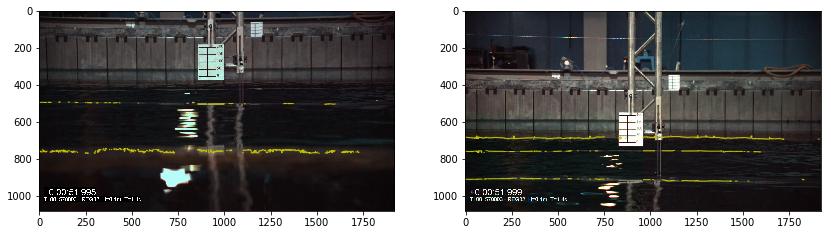

In [13]:
%matplotlib inline

plt.figure(figsize=(14,14))
plt.subplot(121)
plt.imshow(frame_inf)
plt.plot(cristas_inf.iloc[0,:],'y', linewidth=1)
plt.plot(cristas_inf.iloc[1,:],'y', linewidth=1)
plt.plot(cristas_inf.iloc[2,:],'y', linewidth=1)
# plt.plot(cristas_inf.iloc[3,:],'y', linewidth=1)
plt.subplot(122)
plt.imshow(frame_sup)
plt.plot(cristas_sup.iloc[0,:],'y', linewidth=1)
plt.plot(cristas_sup.iloc[1,:],'y', linewidth=1)
plt.plot(cristas_sup.iloc[2,:],'y', linewidth=1)


### Plot frames

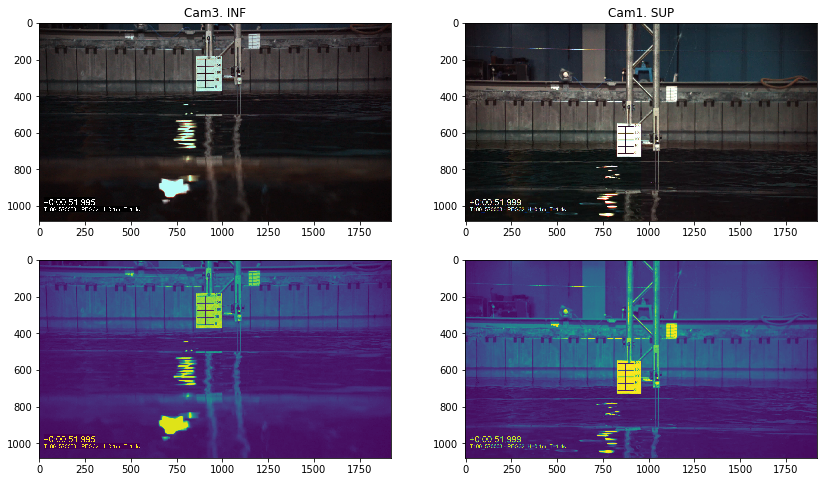

In [14]:
# plot frames inf and sup

plt.figure(figsize=(14,8))
plt.subplot(221)
plt.imshow(frame_inf)
plt.title('Cam3. INF')
plt.subplot(222)
plt.imshow(frame_sup)
plt.title('Cam1. SUP')
plt.subplot(223)
plt.imshow(im_inf)
# plt.title('Cam3. INF')
plt.subplot(224)
plt.imshow(im_sup)
# plt.title('Cam1. SUP')

/usr/local/python/anaconda3/lib/python3.6/site-packages/peakutils/peak.py:84: RuntimeWarning: invalid value encountered in less
  & (np.greater(y, thres)))[0]
/usr/local/python/anaconda3/lib/python3.6/site-packages/peakutils/peak.py:84: RuntimeWarning: invalid value encountered in greater
  & (np.greater(y, thres)))[0]


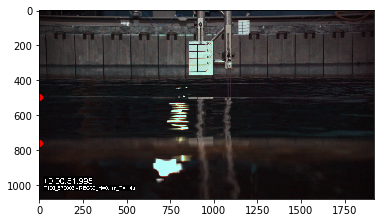

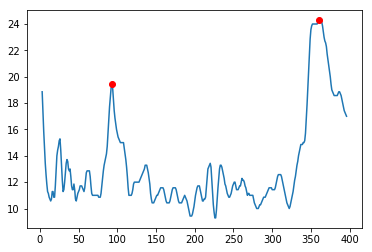

In [15]:
import peakutils
import numpy as np
import pandas as pd

linf=400
lsup=800
        
thres = 0.4 # de 0 a 1

min_dist = 70

vet1 = pd.Series(im_inf[linf:lsup,0].astype(float))
# vet1 = pd.Series(im_inf[:,0].astype(float))

vet = vet1.rolling(window=7, center=True).mean()


indexes = peakutils.indexes(vet, thres, min_dist)
indexes

plt.figure()
plt.imshow(frame_inf)
plt.plot(np.zeros(len(indexes)), indexes+linf, 'or')

plt.figure()
t = np.arange(len(vet))
plt.plot(t, vet)
plt.plot(t[indexes], vet[indexes],'ro')


## Deteccao dos pontos amarelos

In [221]:
# coluna do frame

# vetor de zeros a serem acumuladas as cristas encontradas
ccr = np.zeros(im_inf.shape[0])

# numero de pontos da janela para a media movel
win = 8

# limite para deteccao de cristas
limcr = 4

for c in range(im_inf.shape[1]):
    
    print (c)
    
    vet = pd.Series(im_inf[linf:lsup,c].astype(float))

    # media movel e derivada
    # numero de pontos para media movel
    mm = []
    for i in np.arange(win,len(vet)-win):
        a = vet[i-win:i]
        b = vet[i+1:i+win+1]
        inf = a.mean()
        sup = b.mean()
        mm.append(sup - inf)

    mm = np.array([0]*win + mm + [0]*win)
    
    # acha valores maiores que um limite para identificacao de cristas
    icr = np.where(mm > limcr)[0] + linf
    ccr[icr] = ccr[icr] + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

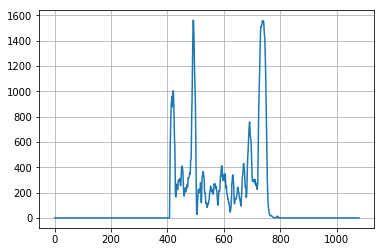

In [293]:
plt.plot(ccr)
plt.grid()

In [294]:
# acha o valor maximo (crista com maior contraste)
ind_crista_1 = np.where(ccr == ccr.max())[0].max()
ind_crista_1

492

In [305]:
# calcular a distancia em metros da crista principal

angs_inf = ondometro.calcular_angulos(f=f,
                                  dist_cam_bal=dist_cam_bal,
                                  pos_centro_ccd_px=pix_centro_ccd,
                                  pos_bal_1_px=pix_bal_1_inf,
                                  alt_cam=alt_cam_inf,
                                  alt_bal_nm=alt_bal_nm,
                                  pix_cr=ind_crista_1)

ang_bal1_ccd_inf, ang_vert_bal1_inf, ang_pitch_inf, ang_ccd_cr_inf, ang_vert_cr_inf = angs_inf

# calcula distancias horizontais das cristas

dist_hor_proj_cr_inf, dist_hor_cr_inf = ondometro.calcular_distancias_horizontais(alt_cam=alt_cam_inf,
                                                                ang_vert_cr=ang_vert_cr_inf,
                                                                alt_nominal_onda=alt_nominal_onda)

print (dist_hor_cr_inf)

5.5896669852946275


In [306]:
ang_vert_cr_inf

1.5368181174752757

In [298]:
ang_vert_cr_inf

1.5368181174752757

In [308]:
# distancia minima entre cristas, em metros

dist_1_cr = dist_hor_cr_inf - comp_nominal_onda/2
dist_2_cr = dist_hor_cr_inf + comp_nominal_onda/2
dist_3_cr = dist_hor_cr_inf
print (dist_1_cr, dist_3_cr, dist_2_cr)

4.060866985294627 5.5896669852946275 7.118466985294628


In [303]:
# calculo do theta_i (angulo vertical crista)

theta_i_1 = np.arctan(dist_1_cr / (alt_cam_inf - alt_nominal_onda))
theta_i_2 = np.arctan(dist_2_cr / (alt_cam_inf - alt_nominal_onda))
theta_i_3 = np.arctan(dist_3_cr / (alt_cam_inf - alt_nominal_onda))
print (theta_i_1, theta_i_3, theta_i_2)

1.536334579039494 1.545755347290926 1.5511317060346277


In [311]:
np.rad2deg(ang_pitch_inf)

2.432709821557796

In [307]:
# calculo do deltah_i (angulo do centro do CCD a crista)

deltah_i_1 = np.deg2rad(90) - theta_i_1 - ang_pitch_inf
deltah_i_2 = np.deg2rad(90) - theta_i_2 - ang_pitch_inf
deltah_i_3 = np.deg2rad(90) - theta_i_3 - ang_pitch_inf
print (deltah_i_1, deltah_i_3, deltah_i_2)

-0.007997048376384708 -0.017417816627816718 -0.0227941753715184


In [312]:
# valor do pixel para buscar a proxima crista

Phi_1 = f * np.tan(deltah_i_1) + pix_centro_ccd
Phi_2 = f * np.tan(deltah_i_2) + pix_centro_ccd
Phi_3 = f * np.tan(deltah_i_3) + pix_centro_ccd
print (Phi_1, Phi_3, Phi_2)

494.73694084327576 441.407800045807 410.9660381669638


In [250]:
comp_nominal_onda

3.0576

In [205]:
# acha valores maiores 
icr = np.where(mm > 4)[0]
cr = mm[icr]

In [210]:
icr

array([ 83,  84,  85,  86,  87,  88,  89,  90, 342, 343, 344, 345, 346,
       347, 348, 349, 350, 351])

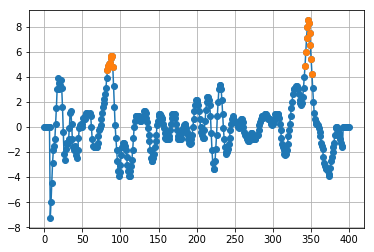

In [207]:
plt.figure()
plt.plot(mm,'-o')
plt.plot(icr,cr, 'o')
plt.grid()

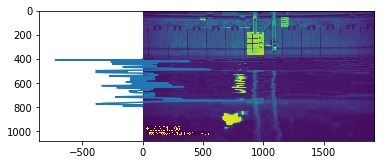

In [187]:
plt.figure()
plt.imshow(im_inf)
plt.plot(mm*100, np.arange(linf,lsup),'-')

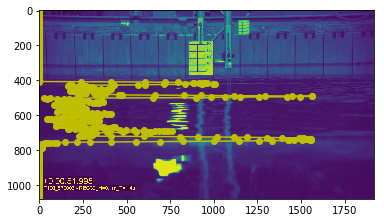

In [227]:
plt.figure()
plt.imshow(im_inf)
plt.plot(ccr, np.arange(len(ccr)),'y-o')

In [229]:
thres = 0.4
min_dist = 70
indexes = peakutils.indexes(ccr, thres, min_dist)


In [174]:
np.arange(linf,lsup).shape

(400,)

In [188]:
lsup

800